In [90]:
import pickle
cluster_grouped = pickle.load(open("cluster_grouped.pkl", 'rb'))

In [91]:
import xgboost as xgb
from xgboost import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from preprocessing import preprocessing, group_features, label_encoder
import numpy as np

In [92]:
X = cluster_grouped.drop(columns=['Cluster'])
X = X[['Tenure', 'Household Size', 'Edu Encoded','Marital Encoded', 'Group Income Encoded', 'Group Age Encoded']]
y = cluster_grouped['Cluster']

In [93]:
cluster_grouped.columns

Index(['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Tenure', 'Household Size', 'Edu Encoded',
       'Marital Encoded', 'Group Income Encoded', 'Group Age Encoded',
       'Cluster'],
      dtype='object')

In [94]:
model = XGBClassifier(random_state=42, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.55      0.62      0.58        58
           2       0.64      0.64      0.64       107
           3       0.92      0.91      0.92       128

    accuracy                           0.80       448
   macro avg       0.76      0.77      0.76       448
weighted avg       0.81      0.80      0.81       448



In [95]:
importance = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

In [96]:
features_df

,Feature,Importance
4,Group Income Encoded,0.584150
0,Tenure,0.161428
1,Household Size,0.089570
2,Edu Encoded,0.065691
5,Group Age Encoded,0.052630
3,Marital Encoded,0.046531


In [97]:
cluster_grouped[['Group Income Encoded', 'Cluster']]

,Group Income Encoded,Cluster
0,3,2
1,3,0
2,4,2
3,2,0
4,3,0
...,...,...
2235,4,2
2236,4,0
2237,3,1
2238,4,2


In [98]:
df = preprocessing('marketing_campaign.csv')
df = group_features(df)

2233


In [99]:
df = label_encoder(df)

In [100]:
df[['Group Income', 'Group Income Encoded']].head()

,Group Income,Group Income Encoded
0,40K–60K,3
1,40K–60K,3
2,60K–80K,4
3,20K–40K,2
4,40K–60K,3


In [101]:
cluster_grouped.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp2,Complain,Response,Tenure,Household Size,Edu Encoded,Marital Encoded,Group Income Encoded,Group Age Encoded,Cluster
0,58,635,88,546,172,88,88,3,8,10,...,0,0,1,663,0,2,4,3,3,2
1,38,11,1,6,2,1,6,2,1,1,...,0,0,0,113,2,2,4,3,4,0
2,26,426,49,127,111,21,42,1,8,2,...,0,0,0,312,0,2,5,4,3,2
3,26,11,4,20,10,3,5,2,2,0,...,0,0,0,139,1,2,5,2,1,0
4,94,173,43,118,46,27,15,5,5,3,...,0,0,0,161,1,4,3,3,1,0


In [102]:
df['Cluster'] = cluster_grouped['Cluster']

In [103]:
df[['Group Income','Cluster','Tenure']].value_counts()

Group Income  Cluster  Tenure
20K–40K       0        91        7
              3        500       6
                       603       5
40K–60K       0        98        5
60K–80K       1        686       5
                                ..
40K–60K       0        349       1
                       347       1
                       341       1
                       339       1
80K-100k      3        680       1
Name: count, Length: 1605, dtype: int64

/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


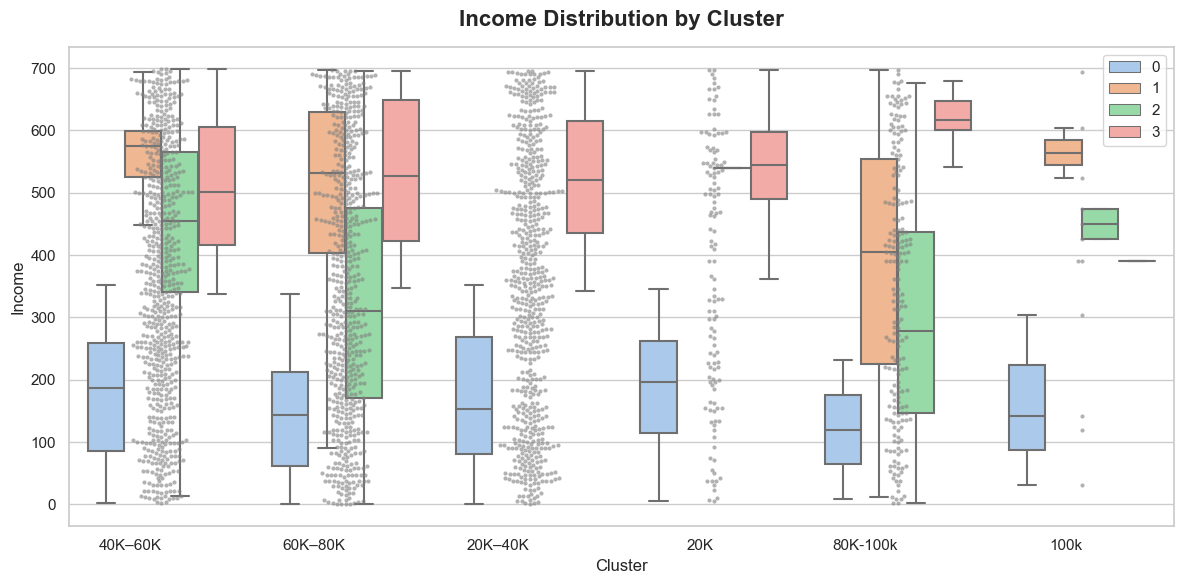

In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Group Income', y='Tenure',hue='Cluster', palette='pastel', showfliers=False)
sns.swarmplot(data=df, x='Group Income', y='Tenure', color='gray', alpha=0.6, size=3)

plt.title("Income Distribution by Cluster", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


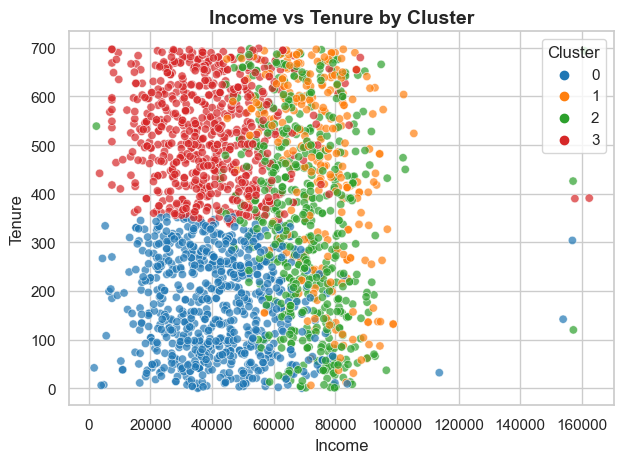

In [105]:
sns.scatterplot(data=df, x='Income', y='Tenure', hue='Cluster', palette='tab10', alpha=0.7)
plt.title("Income vs Tenure by Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Income")
plt.ylabel("Tenure")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Defining Label
### Cluster 0: New Low-Income Customers
### Cluster 1: Loyal High-Income Customers
### Cluster 2: New High-Income Customers
### Cluster 3: Loyal Low-Income Customers

In [153]:
customer_type_list = []
for i in df['Cluster']:
    if i == 0:
        customer_type_list.append('New Low-Income')
    elif i == 1:
        customer_type_list.append('Loyal High-Income')
    elif i == 2:
        customer_type_list.append('New High-Income')
    else:
        customer_type_list.append('Loyal Low-Income')

In [154]:
df['Customer_Type'] = customer_type_list

In [ ]:
df['M']

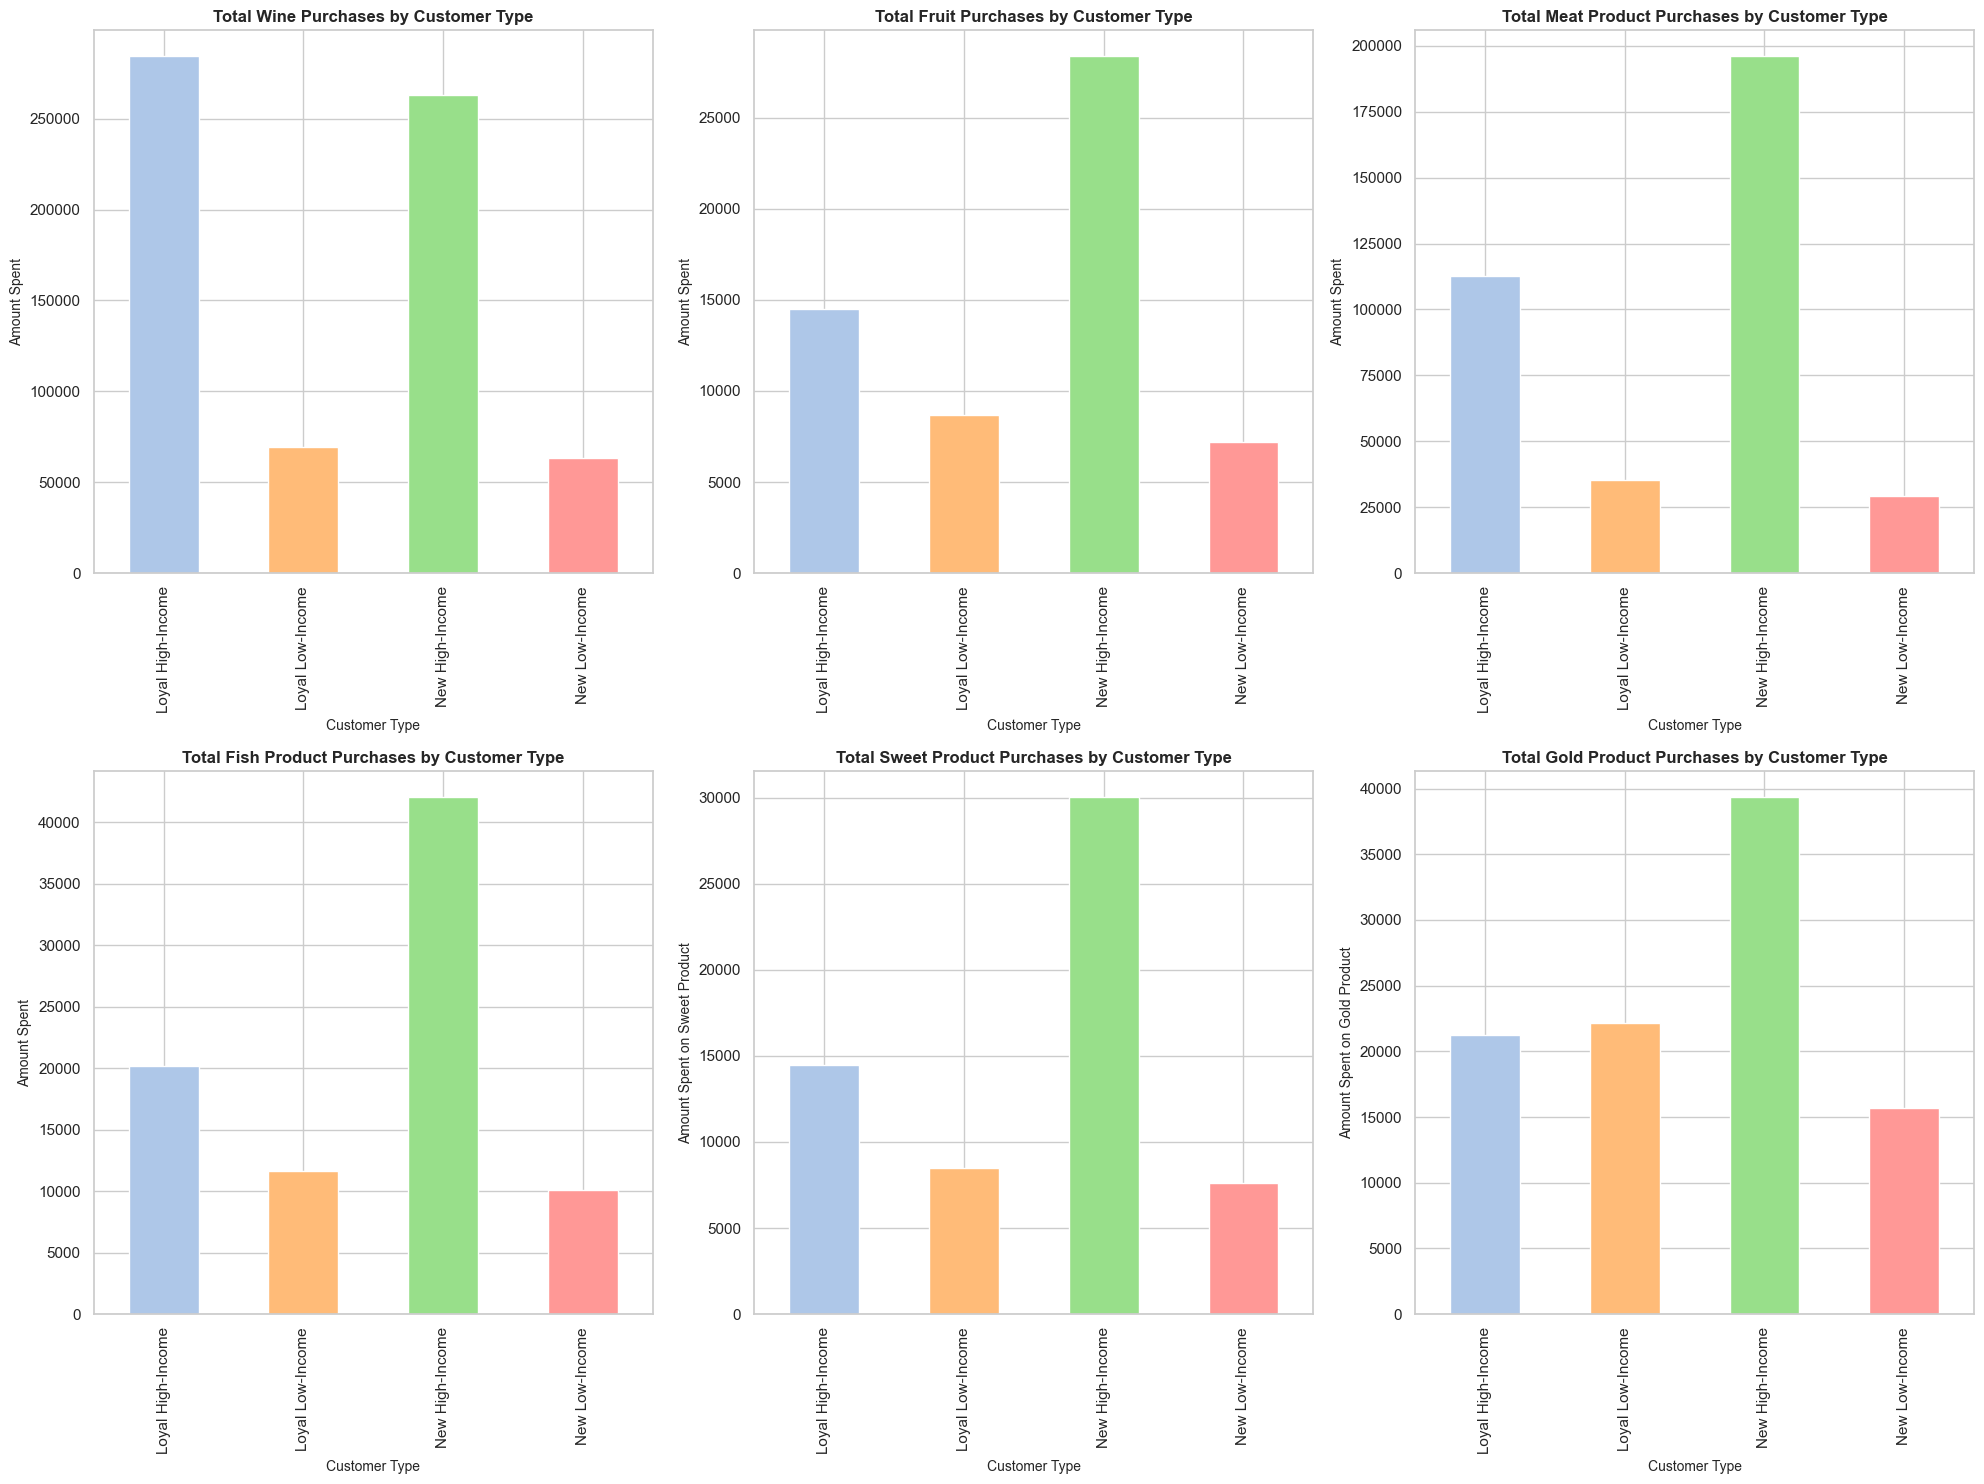

In [170]:
customer_wines = df['MntWines'].groupby(df['Customer_Type']).sum()
customer_fruits = df['MntFruits'].groupby(df['Customer_Type']).sum()
customer_meats = df['MntMeatProducts'].groupby(df['Customer_Type']).sum()
customer_fish = df['MntFishProducts'].groupby(df['Customer_Type']).sum()
customer_sweet = df['MntSweetProducts'].groupby(df['Customer_Type']).sum()
customer_gold = df['MntGoldProds'].groupby(df['Customer_Type']).sum()

pastel_colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896']
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

customer_wines.plot(kind='bar', color=pastel_colors, ax=axes[0, 0])
axes[0, 0].set_title("Total Wine Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Customer Type", fontsize=10)
axes[0, 0].set_ylabel("Amount Spent", fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=90)

# Second subplot: row 0, col 1
customer_fruits.plot(kind='bar', color=pastel_colors, ax=axes[0, 1])
axes[0, 1].set_title("Total Fruit Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Customer Type", fontsize=10)
axes[0, 1].set_ylabel("Amount Spent", fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=90)

# Third subplot: row 1, col 0
customer_meats.plot(kind='bar', color=pastel_colors, ax=axes[0, 2])
axes[0, 2].set_title("Total Meat Product Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel("Customer Type", fontsize=10)
axes[0, 2].set_ylabel("Amount Spent", fontsize=10)
axes[0, 2].tick_params(axis='x', rotation=90)

# Fourth subplot: row 1, col 1
customer_fish.plot(kind='bar', color=pastel_colors, ax=axes[1, 0])
axes[1, 0].set_title("Total Fish Product Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Customer Type", fontsize=10)
axes[1, 0].set_ylabel("Amount Spent", fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=90)

customer_sweet.plot(kind='bar', color=pastel_colors, ax=axes[1, 1])
axes[1, 1].set_title("Total Sweet Product Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Customer Type", fontsize=10)
axes[1, 1].set_ylabel("Amount Spent on Sweet Product", fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=90)

customer_gold.plot(kind='bar', color=pastel_colors, ax=axes[1, 2])
axes[1, 2].set_title("Total Gold Product Purchases by Customer Type", fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel("Customer Type", fontsize=10)
axes[1, 2].set_ylabel("Amount Spent on Gold Product", fontsize=10)
axes[1, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()